# Mach-Zehnder Interferometer

<img src="MZI_instr.png" alt="MZI Instrument" width="800"/>

A particle, say a photon, impinges on a beam-splitter (BS1), and, with some probability amplitudes, propagates via two different paths to another beam-splitter (BS2) which directs the particle to one of the two detectors. Along each path between the two beam-splitters, is a phase shifter (PS). If the lower path is labelled as state |0⟩ and the upper one as state |1⟩ then the particle, initially in path | 0⟩, undergoes the following sequence of transformations

\begin{aligned}
|0\rangle \quad & \frac{BS 1}{\longrightarrow} \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\\
& \frac{PS}{\longrightarrow} \frac{1}{\sqrt{2}}\left(e^{i \phi_{0}}|0\rangle+e^{i \phi_{1}}|1\rangle\right)=e^{i \frac{\phi_{0}+\phi_{1}}{2}} \frac{1}{\sqrt{2}}\left(e^{i \frac{\phi_{0}-\phi_{1}}{2}}|0\rangle+e^{-i \frac{\phi_{0}-\phi_{1}}{2}}|1\rangle\right) \\
& \frac{BS 2}{\longrightarrow} e^{i \frac{\phi_{1}+\phi_{2}}{2}}\left(\cos \frac{1}{2}\left(\phi_{0}-\phi_{1}\right)|0\rangle+i \sin \frac{1}{2}\left(\phi_{0}-\phi_{1}\right)|1\rangle\right)
\end{aligned}

where φ0 and φ1 are the settings of the two phase shifters and the action of the beam-splitters is defined as

\begin{aligned}
&|0\rangle \quad \longrightarrow \quad \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\\
&|1\rangle \quad \longrightarrow \quad \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)
\end{aligned}

(and extends by linearity to states of the form $\alpha|0\rangle+\beta|1\rangle$ ). Here, we have ignored the $e^{i \frac{\phi_{0}+\phi_{0}}{2}}$ phase shift in the reflected beam, which is irrelevant because the interference pattern depends only on the difference between the phase shifts in different arms of the interferometer. The phase shifters in the two paths can be tuned to effect any prescribed relative phase shift $\phi=\phi_{0}-\phi_{1}$ and to direct the particle with probabilities $\cos ^{2}\left(\frac{\phi}{2}\right)$ and $\sin ^{2}\left(\frac{\phi}{2}\right)$ respectively to detectors "0" and " $1 "$

The roles of the three key ingredients in this experiment are clear. The first beam splitter prepares a superposition of possible paths, the phase shifters modify quantum phases in different paths and the second beam-splitter combines all the paths together. 

As we shall see, most quantum algorithms follow this interferometry paradigm: 
1. a superposition of computational paths is prepared by the Hadamard (or the Fourier) transform
1. followed by a quantum function evaluation which effectively introduces phase shifts into different computational paths
1. followed by the Hadamard or the Fourier transform which acts somewhat in reverse to the first Hadamard/Fourier transform and combines the computational paths together. 

To see this, let us start by rephrasing Mach-Zehnder interferometry in terms of quantum circuits.

## Mach-Zehnder Interferometer in Quantum Circuits

It is convenient to view this experiment as a quantum circuit with three quantum logic gates (elementary unitary transformations) operating on a qubit (a generic two-state system with a prescribed computational basis {$|0\rangle$ , $|1\rangle$}). The beam-splitters will be now called the Hadamard gates and the phase shifters the phase shift gates.

<img src="MZI_circuit.png" alt="MZI Circuit" width="500"/>

The Hadamard gate is the single qubit gate H performing the unitary transformation known as the Hadamard transform given by

$$
\mathbf{H}=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right) \quad|x\rangle \longrightarrow[\mathbf{H}]-|0\rangle+(-1)^{x}|1\rangle
$$

The matrix is written in the basis {$|0\rangle$ , $|1\rangle$} and the diagram on the right provides a schematic representation of the gate $\mathbf{H}$ acting on a qubit in state $|x\rangle$, with $x=0,1 .$ Using the same notation we define the phase shift gate $\phi$ as a single qubit gate such that $|0\rangle\mapsto|0\rangle$ and $|1\rangle\mapsto e^{i \phi}|1\rangle$
$$
\phi=\left(\begin{array}{cc}
1 & 0 \\
0 & e^{i \phi}
\end{array}\right) 
\quad|x\rangle \longrightarrow -e^{i x \phi}| x \rangle
$$

Now let's create this quantum circuit in Qiskit.

<img src="MZI-result-example.pdf" alt="MZI Result Example" width="500"/>

In [1]:
from qiskit import QuantumCircuit, execute, transpile
from qiskit.circuit import Parameter
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from math import pi
import math
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Find a quantum gate in Qiskit to implement phase shift gate. Check [this chapter]( https://qiskit.org/textbook/ch-states/single-qubit-gates.html) in the Qiskit textbook for a list of single-qubit gates in Qiskit.

In [2]:
# Constract a quantum circuit for Mach-Zehnder Interferometer with phi = pi
#         ┌───┐┌─────────┐┌───┐ ░ ┌─┐
#    q_0: ┤ H ├┤ ??????? ├┤ H ├─░─┤M├
#         └───┘└─────────┘└───┘ ░ └╥┘
# meas: 1/═════════════════════════╩═
                                 0 
mz = QuantumCircuit(1)
mz.h(0)
mz.u1(phi, 0)
mz.h(0)
mz.measure_all()
mz.draw(output='text')

IndentationError: unexpected indent (<ipython-input-2-b09992e70b3c>, line 6)

In [ ]:
phi = Parameter('phi')

In [5]:
n_max = 40
parameter_list = [{phi:pi*n} for n in np.linspace(0,4,40)]

In [5]:
shots=1024
job_ideal = execute(mz, parameter_binds=parameter_list, backend=QasmSimulator(), shots=shots)

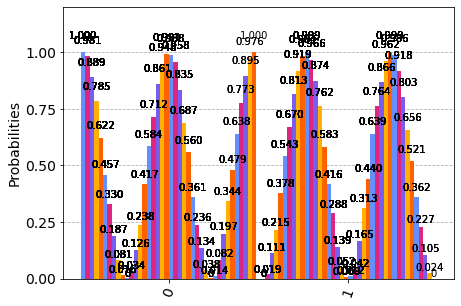

In [8]:
plot_histogram(job_ideal.result().get_counts())

In [4]:
from qiskit import IBMQ

In [5]:
IBMQ.load_account()

/Users/junye/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = IBMQ.get_provider('ibm-q-internal')
provider

<AccountProvider for IBMQ(hub='ibm-q-internal', group='deployed', project='default')>

In [7]:
ibmq_armonk = provider.get_backend('ibmq_armonk')
ibmq_yorktown = provider.get_backend('ibmq_5_yorktown') 
ibmq_melbourne = provider.get_backend('ibmq_16_melbourne')
ibmq_vigo = provider.get_backend('ibmq_vigo')

In [10]:
job_armonk = execute(mz, parameter_binds=parameter_list, backend=ibmq_armonk, shots=1024)

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [9]:
job_yorktown = execute(mz, parameter_binds=parameter_list, backend=ibmq_yorktown, shots=1024)

In [10]:
job_melbourne = execute(mz, parameter_binds=parameter_list, backend=ibmq_melbourne, shots=1024)

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [13]:
job_vigo = execute(mz, parameter_binds=parameter_list, backend=ibmq_vigo, shots=1024)

In [13]:
job_armonk = ibmq_armonk.retrieve_job('5f7421854d66ec0012f0fed0')
job_yorktown = ibmq_yorktown.retrieve_job('5f742836661aec0012537cf0')
job_melbourne = ibmq_melbourne.retrieve_job('5f74287c359f1b001341fdab')
job_vigo = ibmq_vigo.retrieve_job('5f7428a6359f1b001341fdad')

In [11]:
job_yorktown_rz = ibmq_yorktown.retrieve_job('5f7ae983eea12a001afee8e6')

In [14]:
jobs = [job_armonk, job_yorktown, job_melbourne, job_vigo]

In [17]:
jobs = [job_yorktown_rz]

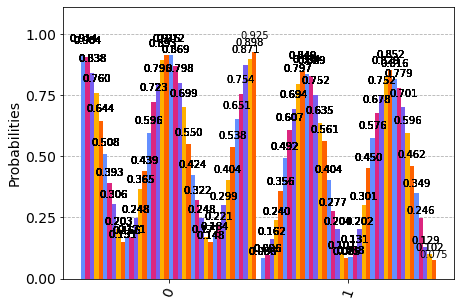

In [13]:
plot_histogram(jobs[0].result().get_counts())

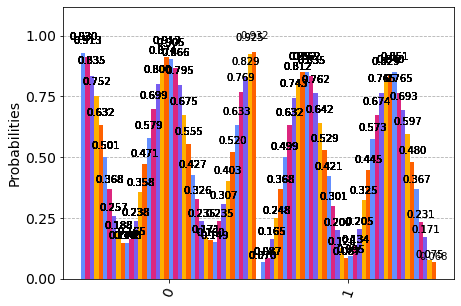

In [21]:
plot_histogram(jobs[1].result().get_counts())

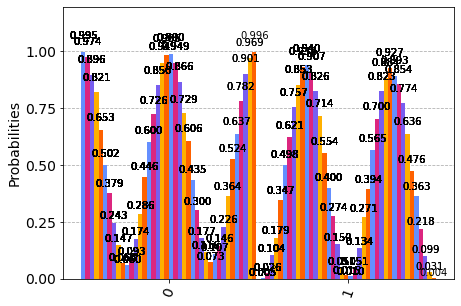

In [22]:
plot_histogram(jobs[2].result().get_counts())

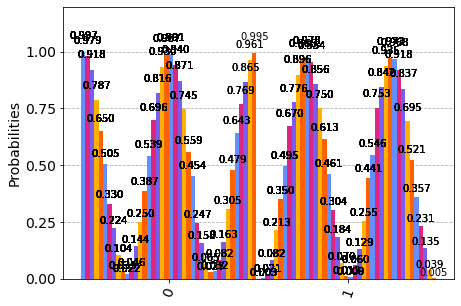

In [23]:
plot_histogram(jobs[3].result().get_counts())

In [21]:
counts = job.result().get_counts()

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [57]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

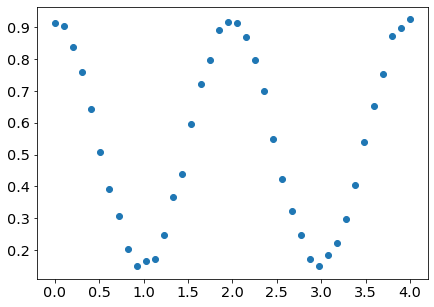

In [58]:
shots = 1024
fig, ax = plt.subplots(figsize=(7, 5))
x = [n for n in np.linspace(0,4,40)]
visibility = {}
for job in jobs:
    y = [d['0']/shots for d in job.result().get_counts()]
    vis = (max(y)-min(y))/(max(y)+min(y))
    visibility[job.backend().name()] = vis
    ax.scatter(x,y, label="Exp")
    #ax.scatter(x,y, label=f"{job.backend().name()}, Vis: {vis:.3f}")

In [59]:
ideal_x = np.linspace(0,4,100)
ideal_y = 1/2 * (1 + np.cos(ideal_x * pi))

In [60]:
ax.plot(ideal_x,ideal_y, 'y', label='Ideal')

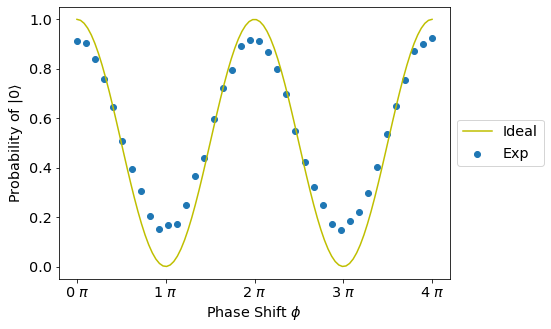

In [68]:
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel(r'Probability of $|0\rangle$')
ax.set_xlabel(r'Phase Shift $\phi$')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))
fig

In [67]:
fig.savefig('MZI-result-example.pdf', bbox_inches="tight")

In [107]:
fig.savefig('Mach_Zehnder.png', dpi=100, bbox_inches="tight")

Visibility

$$V=(p_{max}(0)-p_{min}(0))/(p_{max}(0)+p_{min}(0))$$

In [55]:
visibility = {}

In [58]:
for job in jobs:
    y = [d['0']/shots for d in job.result().get_counts()]
    visibility[job.backend().name()] = (max(y)-min(y))/(max(y)+min(y))

In [59]:
visibility

{'ibmq_armonk': 0.8733705772811918,
 'ibmqx2': 0.7251356238698011,
 'ibmq_16_melbourne': 0.8871415356151712,
 'ibmq_vigo': 0.9559386973180076}